In [27]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [29]:
tf.test.is_built_with_cuda()

False

In [30]:
IMAGE_SIZE = 256
CHANNELS = 3
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    # save_to_dir = "AugmentedImages"
)


Found 1506 images belonging to 3 classes.


In [31]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [32]:
for image_batch,label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [33]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.62129414 0.5899216  0.640902  ]
  [0.6214913  0.59011877 0.64109915]
  [0.6216884  0.5903159  0.64129627]
  ...
  [0.4875501  0.45617756 0.507158  ]
  [0.51318645 0.48181385 0.5327943 ]
  [0.51933336 0.48796082 0.5389412 ]]

 [[0.6262989  0.59492636 0.64590675]
  [0.62570757 0.594335   0.6453154 ]
  [0.62511617 0.5937436  0.644724  ]
  ...
  [0.48952132 0.45814875 0.50912917]
  [0.5135807  0.4822081  0.5331885 ]
  [0.5195305  0.48815793 0.5391384 ]]

 [[0.63804877 0.6066762  0.6576566 ]
  [0.6374574  0.6060848  0.6570652 ]
  [0.63686603 0.6054935  0.6564739 ]
  ...
  [0.4914925  0.46011996 0.51110035]
  [0.51397485 0.48260236 0.5335827 ]
  [0.5197276  0.48835507 0.5393354 ]]

 ...

 [[0.6223322  0.59095967 0.64194006]
  [0.5935625  0.56218994 0.6131703 ]
  [0.5738778  0.54250526 0.59348565]
  ...
  [0.47084755 0.41986716 0.48653382]
  [0.4704533  0.4194729  0.48613957]
  [0.47005907 0.41907865 0.48574534]]

 [[0.6243034  0.59293085 0.64391124]
  [0.58824027 0.5568677  0.60784817]


In [34]:
for image_batch,label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.5234496  0.5116849  0.55482215]
  [0.521256   0.5094913  0.5526286 ]
  [0.5207082  0.5089435  0.55208075]
  ...
  [0.7134091  0.705566   0.7565464 ]
  [0.7137255  0.7058824  0.7568628 ]
  [0.7100391  0.70219594 0.75317633]]

 [[0.5531379  0.5413732  0.58451045]
  [0.5501323  0.53836757 0.5815048 ]
  [0.54574996 0.53398526 0.5771225 ]
  ...
  [0.7137255  0.7058824  0.7568628 ]
  [0.7133744  0.70553124 0.7565116 ]
  [0.70980394 0.7019608  0.75294125]]

 [[0.5562299  0.5444652  0.58760244]
  [0.55647326 0.54470855 0.5878458 ]
  [0.5559254  0.5441607  0.587298  ]
  ...
  [0.7137255  0.7058824  0.7568628 ]
  [0.71282667 0.7049835  0.7559639 ]
  [0.70980394 0.7019608  0.75294125]]

 ...

 [[0.6072798  0.59943664 0.65041703]
  [0.5890553  0.58121216 0.63219255]
  [0.56453377 0.55669063 0.607671  ]
  ...
  [0.69897664 0.69505507 0.749957  ]
  [0.6984288  0.69450724 0.7494092 ]
  [0.69803923 0.69411767 0.7490196 ]]

 [[0.6226179  0.6147747  0.66575515]
  [0.5813862  0.5735431  0.62452346]


In [35]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= 32,
    class_mode = "sparse"
)

Found 215 images belonging to 3 classes.


In [36]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode = "sparse"
)

Found 431 images belonging to 3 classes.


In [37]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6901961  0.6431373  0.6509804 ]
  [0.6901961  0.6431373  0.6509804 ]
  [0.68309206 0.63603324 0.6438764 ]
  ...
  [0.6415337  0.58271015 0.59447485]
  [0.6409126  0.58208907 0.5938538 ]
  [0.6402916  0.58146805 0.59323275]]

 [[0.6901961  0.6431373  0.6509804 ]
  [0.6901961  0.6431373  0.6509804 ]
  [0.68350613 0.6364473  0.64429045]
  ...
  [0.7555236  0.6967001  0.7084648 ]
  [0.7631834  0.7043599  0.7161246 ]
  [0.77084315 0.7120196  0.7237843 ]]

 [[0.6901961  0.6431373  0.6509804 ]
  [0.6901961  0.6431373  0.6509804 ]
  [0.68392015 0.6368613  0.64470446]
  ...
  [0.50817084 0.44934732 0.46111202]
  [0.48995298 0.43112946 0.44289416]
  [0.47173512 0.4129116  0.4246763 ]]

 ...

 [[0.51520365 0.46814486 0.5073605 ]
  [0.51603174 0.46897292 0.5081886 ]
  [0.5168598  0.46980104 0.5090167 ]
  ...
  [0.3890189  0.3380385  0.37333262]
  [0.4365093  0.38552892 0.42082304]
  [0.60177875 0.55079836 0.5860925 ]]

 [[0.5315962  0.4845374  0.52375305]
  [0.53283834 0.48577952 0.5249952 ]


In [38]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [40]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [41]:
1506/32

47.0625

In [42]:
215/32

6.71875

In [43]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)
    

Epoch 1/20
47/47 [==============================] - 48s 983ms/step - loss: 0.9077 - accuracy: 0.4824 - val_loss: 0.8841 - val_accuracy: 0.4688
Epoch 2/20
47/47 [==============================] - 48s 1s/step - loss: 0.7174 - accuracy: 0.6235 - val_loss: 0.6030 - val_accuracy: 0.7448
Epoch 3/20
47/47 [==============================] - 48s 1s/step - loss: 0.6517 - accuracy: 0.7076 - val_loss: 0.4963 - val_accuracy: 0.7604
Epoch 4/20
47/47 [==============================] - 46s 980ms/step - loss: 0.3589 - accuracy: 0.8406 - val_loss: 0.2732 - val_accuracy: 0.8958
Epoch 5/20
47/47 [==============================] - 49s 1s/step - loss: 0.2675 - accuracy: 0.8881 - val_loss: 0.2349 - val_accuracy: 0.8854
Epoch 6/20
47/47 [==============================] - 49s 1s/step - loss: 0.2285 - accuracy: 0.9118 - val_loss: 0.3307 - val_accuracy: 0.8646
Epoch 7/20
47/47 [==============================] - 47s 986ms/step - loss: 0.1776 - accuracy: 0.9274 - val_loss: 0.2027 - val_accuracy: 0.9062
Epoch 8/20


In [44]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 6s 455ms/step - loss: 0.2190 - accuracy: 0.9350


In [45]:
scores

[0.21900402009487152, 0.9350348114967346]

In [46]:
history

In [47]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
type(history.history['loss'])

list

In [50]:
len(history.history['loss'])

20

In [51]:
history.history['loss'][:5]

[0.9076976180076599,
 0.7173923850059509,
 0.6517101526260376,
 0.3589256703853607,
 0.26754525303840637]

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [53]:
val_acc

[0.46875,
 0.7447916865348816,
 0.7604166865348816,
 0.8958333134651184,
 0.8854166865348816,
 0.8645833134651184,
 0.90625,
 0.90625,
 0.953125,
 0.9375,
 0.9583333134651184,
 0.9322916865348816,
 0.9427083134651184,
 0.953125,
 0.9375,
 0.96875,
 0.9375,
 0.8645833134651184,
 0.9635416865348816,
 0.9583333134651184]

In [54]:
acc

[0.48236092925071716,
 0.6234735250473022,
 0.7075983881950378,
 0.8405698537826538,
 0.888059675693512,
 0.9118046164512634,
 0.9274083971977234,
 0.9260515570640564,
 0.9341926574707031,
 0.9185888767242432,
 0.9362279772758484,
 0.9606512784957886,
 0.9511533379554749,
 0.9443690776824951,
 0.9586160182952881,
 0.9606512784957886,
 0.9613296985626221,
 0.9633650183677673,
 0.9647218585014343,
 0.9748982191085815]

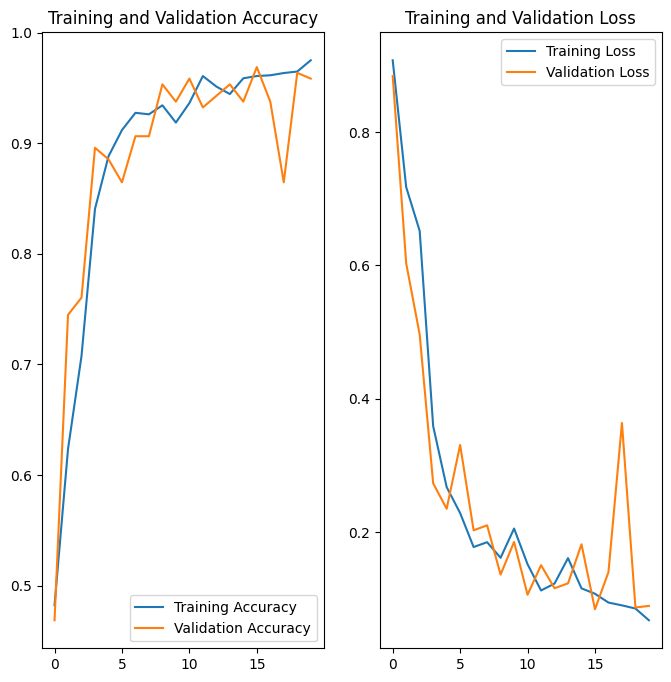

In [55]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 328ms/step
predicted label: Potato___Late_blight


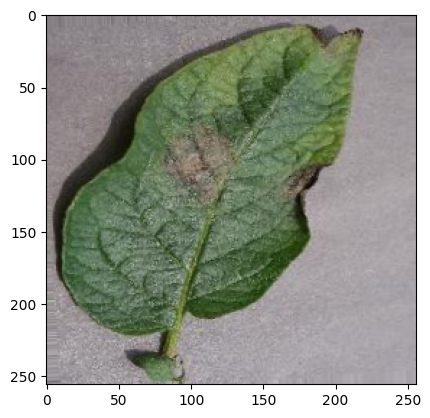

In [60]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [61]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


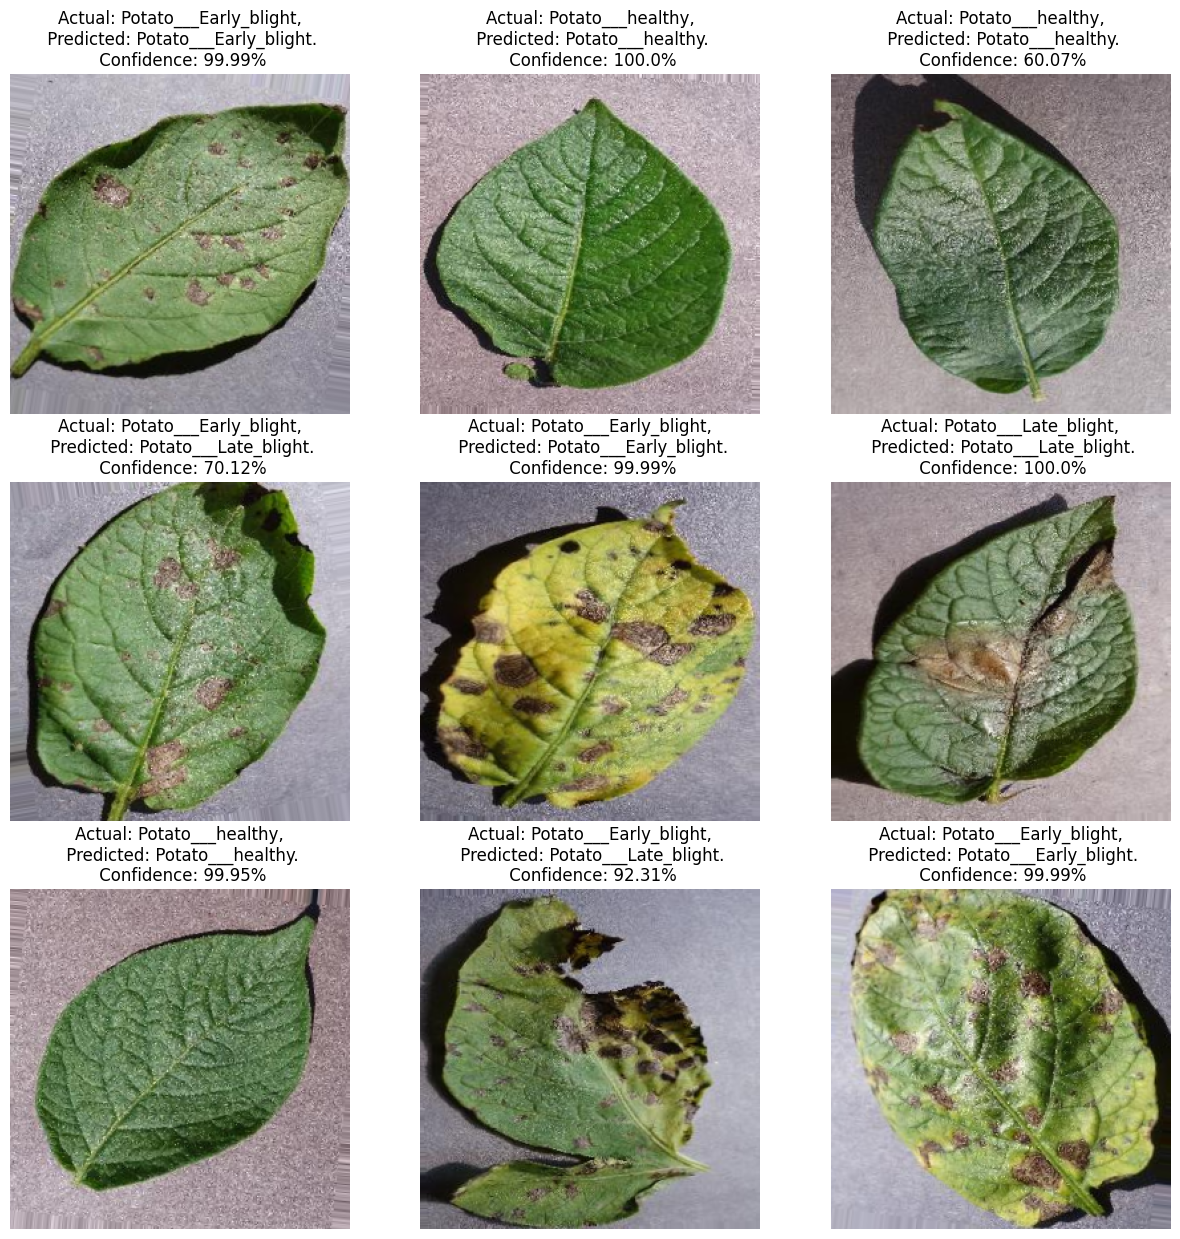

In [62]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [63]:
model.save("../potatoes.h5")

C:\Users\visha\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
